In [1]:
#!/usr/bin/env python
# coding: utf-8
import sys #ver python path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
df = pd.read_csv('./data_cleaning.csv',sep=';')
#df = df.drop(columns=['index'])
df["ncm"] = df["ncm"].astype(str)
for i in range(len(df)):
  if len(df["ncm"].iloc[i]) < 8:
    df["ncm"].iloc[i] = "0"+ df["ncm"].iloc[i]
df['ncm'] = df['ncm'].astype(str).str[:2]

C:\Users\Pedro\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


<AxesSubplot:xlabel='ncm'>

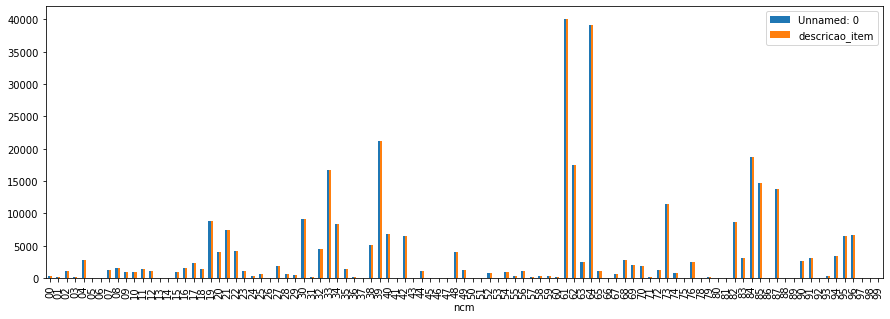

In [3]:
import matplotlib.pyplot as plt

#df = df[['ncm','descricao_item']]
df_group = df.groupby('ncm').count()
df_group
df_group.plot.bar( figsize=(15, 5))


In [4]:
df_group = df_group.drop(columns=['Unnamed: 0'])

In [74]:
df_group['descricao_item'].index[0]

'00'

In [5]:
over5000 = []
median = []
less1000 = []

for i in range(len(df_group)):
    if df_group['descricao_item'].iloc[i] > 5000:
        over5000.append(df_group['descricao_item'].index[i])
    elif df_group['descricao_item'].iloc[i] < 1000:
        less1000.append(df_group['descricao_item'].index[i])
    else:
        median.append(df_group['descricao_item'].index[i])

In [7]:
print(f"acima de 5000 amostras {len(over5000)}\nentre 5000 e 1000 {len(median)}\nabaixo de 1000 {len(less1000)}")


acima de 5000 amostras 19
entre 5000 e 1000 31
abaixo de 1000 49


In [12]:
import pandas as pd
import numpy as np
np.random.seed(10)

remove_n = 4
data = pd.DataFrame({"class":[1,2,3,4], "b":[5,6,7,8]})

drop_indices = np.random.choice(df.index, remove_n, replace=False)
print(drop_indices)
df_subset = df.drop(drop_indices)


remove_n = 10
remove_class = 1
# Here you first find the indexes where class is equal to the class you want to drop.
#Then you slice only the first n indexes of this class
index_to_drop = data.index[data['class'] == remove_class][:remove_n]
#Finally drop those indexes
data = data.drop(index_to_drop)

[2 0 3 1]


In [100]:
over1000 = []
less100 = []
median = []
for i in range(len(df_group)):
    if df_group['descricao_item'].iloc[i] > 1000:
        over1000.append(df_group['descricao_item'].index[i])
    elif df_group['descricao_item'].iloc[i] <= 100:
        less100.append(df_group['descricao_item'].index[i])
    else:
        median.append(df_group['descricao_item'].index[i])

In [102]:
print(f"acima de 1000 amostras {len(over1000)}\nentre 1000 e 100 {len(median)}\nabaixo de 100 {len(less100)}")

acima de 1000 amostras 50
entre 1000 e 100 23
abaixo de 100 26


In [93]:
from statistics import mean

for i in range(0, len(less1000)):
    less1000[i] = int(less1000[i])

mean(less1000)

50.63265306122449

<AxesSubplot:>

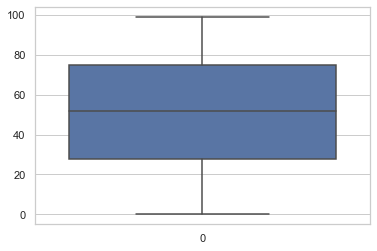

In [99]:
import seaborn as sbn
  
sbn.set_theme(style="whitegrid")


# Creating plot 
mySeries = pd.Series(less1000)
mySeries
sbn.boxplot(data=mySeries) 